In [1]:
import csv, networkx as nx, operator

g = nx.Graph()
reader = csv.reader(open('lesmis.csv', 'r'), delimiter = ',')
data = [row for row in reader]

nodes = set([row[0] for row in data])
edges = [(row[0], row[2]) for row in data]

g.add_nodes_from(nodes)
g.add_edges_from(edges)

In [5]:
#nodes
#[row[2] for row in data]
#edges

In [2]:
print(nodes)

{'Babet', 'Claquesous', 'Javert', 'Perpetue', 'Gribier', 'Eponine', 'Listolier', 'Isabeau', 'Child2', 'Woman1', 'Magnon', 'Enjolras', 'Favourite', 'MmeMagloire', 'MmeThenardier', 'MmeBurgon', 'Cravatte', 'Gillenormand', 'MmePontmercy', 'Tholomyes', 'Judge', 'Boulatruelle', 'Feuilly', 'Fameuil', 'Thenardier', 'Brujon', 'CountessDeLo', 'Brevet', 'Dahlia', 'Child1', 'Labarre', 'Geborand', 'Montparnasse', 'MotherPlutarch', 'Bahorel', 'Blacheville', 'Count', 'Myriel', 'Prouvaire', 'Combeferre', 'Woman2', 'Bamatabois', 'Gervais', 'Fantine', 'Jondrette', 'Bossuet', 'Champmathieu', 'Simplice', 'MmeHucheloup', 'MlleBaptistine', 'Zephine', 'Anzelma', 'Cochepaille', 'OldMan', 'Gavroche', 'Champtercier', 'Mabeuf', 'Napoleon', 'Fauchelevent', 'MlleGillenormand', 'Toussaint', 'Chenildieu', 'Valjean', 'Marguerite', 'Pontmercy', 'Marius', 'MmeDeR', 'Grantaire', 'Scaufflaire', 'MotherInnocent', 'Cosette', 'Courfeyrac', 'BaronessT', 'LtGillenormand', 'Joly', 'Gueulemer', 'MlleVaubois'}


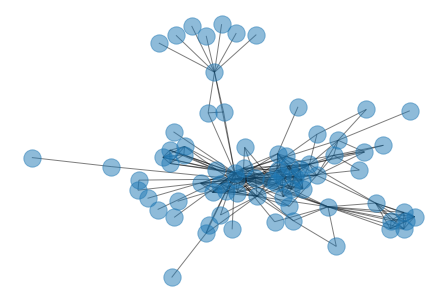

In [3]:
import matplotlib.pyplot as plt

nx.draw(g, alpha = 0.5)
plt.show()

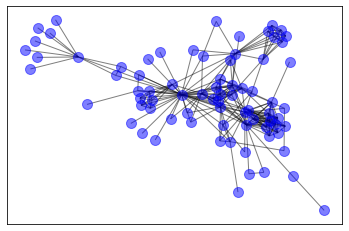

In [4]:
pos = nx.spring_layout(g)

nx.draw_networkx_nodes(g, pos, 
                      node_color = 'blue',
                      node_size = 100, 
                      alpha = 0.5)

nx.draw_networkx_edges(g, pos, width = 1.0, alpha = 0.5)

## Centrality measure

### 1. Degree Centrality

연결된 노드가 많을 수록 중요도 높음

In [6]:
D_centrality = nx.degree_centrality(g)

cent_items = [(b, a) for (a, b) in D_centrality.items()]
cent_items.sort()
cent_items.reverse()

print(cent_items[:5])

[(0.47368421052631576, 'Valjean'), (0.2894736842105263, 'Gavroche'), (0.25, 'Marius'), (0.22368421052631576, 'Javert'), (0.21052631578947367, 'Thenardier')]


In [7]:
D_centrality.items()
#D_centrality.keys()

dict_items([('Babet', 0.13157894736842105), ('Claquesous', 0.13157894736842105), ('Javert', 0.22368421052631576), ('Perpetue', 0.02631578947368421), ('Gribier', 0.013157894736842105), ('Eponine', 0.14473684210526316), ('Listolier', 0.09210526315789473), ('Isabeau', 0.013157894736842105), ('Child2', 0.02631578947368421), ('Woman1', 0.02631578947368421), ('Magnon', 0.02631578947368421), ('Enjolras', 0.19736842105263158), ('Favourite', 0.09210526315789473), ('MmeMagloire', 0.039473684210526314), ('MmeThenardier', 0.14473684210526316), ('MmeBurgon', 0.02631578947368421), ('Cravatte', 0.013157894736842105), ('Gillenormand', 0.09210526315789473), ('MmePontmercy', 0.02631578947368421), ('Tholomyes', 0.11842105263157894), ('Judge', 0.07894736842105263), ('Boulatruelle', 0.013157894736842105), ('Feuilly', 0.14473684210526316), ('Fameuil', 0.09210526315789473), ('Thenardier', 0.21052631578947367), ('Brujon', 0.09210526315789473), ('CountessDeLo', 0.013157894736842105), ('Brevet', 0.0789473684210

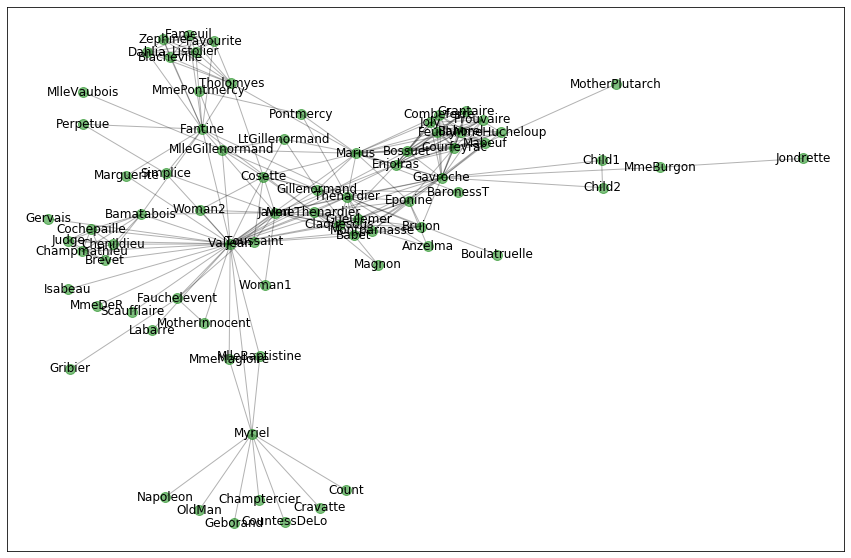

In [8]:
pos = nx.spring_layout(g)
plt.rcParams.update({'figure.figsize': (15, 10)})

nx.draw_networkx_nodes(g, pos,
                      node_color = 'green', 
                      node_size = 100,
                      alpha = 0.5)

nx.draw_networkx_edges(g, pos, width = 1.0, alpha = 0.3)

labels = {}
for (node, value) in D_centrality.items():
    labels[node] = node, value
    labels[node] = node
    
nx.draw_networkx_labels(g, pos, labels, font_size = 12)
plt.show()

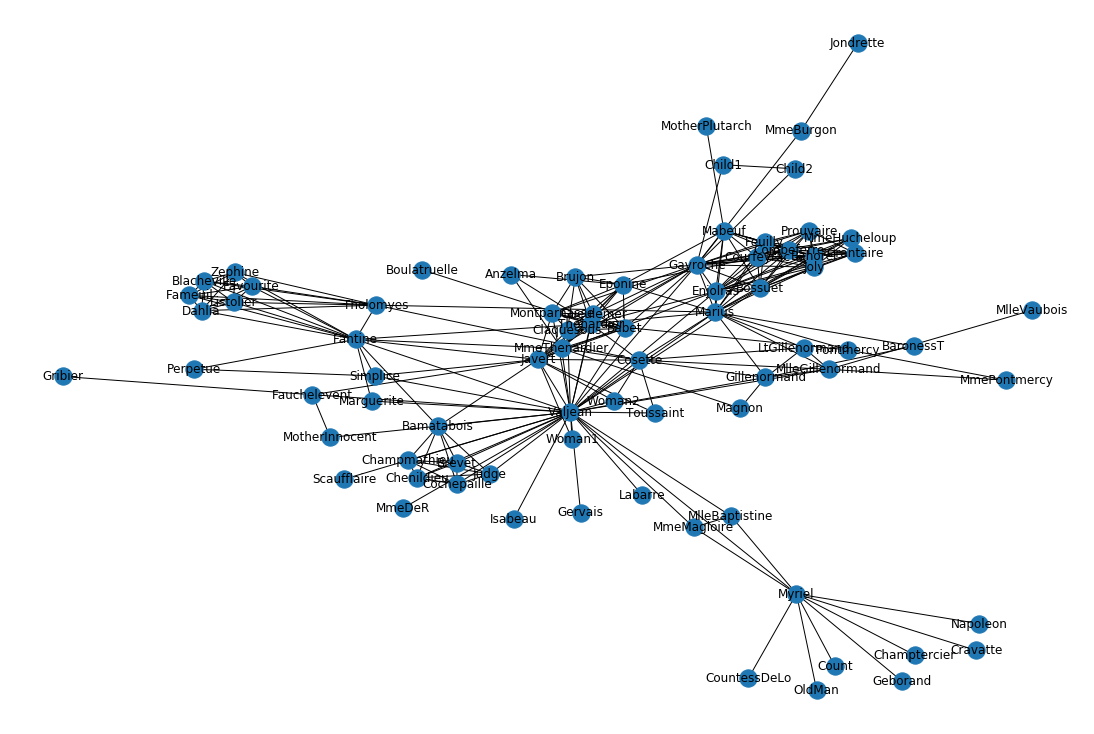

In [49]:
#pos = nx.spring_layout(g)
#plt.rcParams.update({'figure.figsize': (15, 10)})


#nx.draw(g, pos, with_labels = True)
#nx.draw_networkx_nodes(g, pos, 
 #                     node_color = 'grey', 
  #                    node_size = 100,
   #                   alpha = 0.3)

#nx.draw_networkx_edges(g, pos, width = 1.0, alpha = 0.5)

#nx.draw_networkx_labels(g, pos, with_labels = True)

### 2. Closeness Centrality

- 모든 노드와의 거리가 가까울수록 
- 다른 모든 노드와의 거리의 합이 작을 수록 중요도 높음

In [9]:
closeness_centrality = nx.closeness_centrality(g)

cent_items = [(b, a) for (a, b) in closeness_centrality.items()]
cent_items.sort()
cent_items.reverse()

print(cent_items[:5])

[(0.6440677966101694, 'Valjean'), (0.5314685314685315, 'Marius'), (0.5170068027210885, 'Thenardier'), (0.5170068027210885, 'Javert'), (0.5135135135135135, 'Gavroche')]


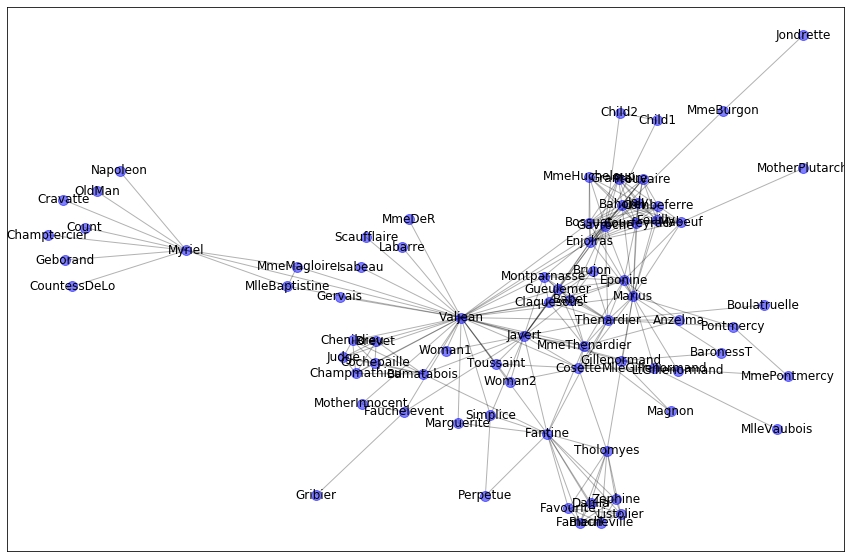

In [10]:
pos = nx.spring_layout(g)
plt.rcParams.update({'figure.figsize': (15, 10)})

nx.draw_networkx_nodes(g, pos,
                      node_color = 'blue', 
                      node_size = 100,
                      alpha = 0.5)

nx.draw_networkx_edges(g, pos, width = 1.0, alpha = 0.3)

labels = {}
for (node, value) in closeness_centrality.items():
    labels[node] = node, value
    labels[node] = node
    
nx.draw_networkx_labels(g, pos, labels, font_size = 12)
plt.show()

### 3. Betweenness Centrality

- 노드 간의 경로에 있을수록
- 모든 두 쌍의 노드 간에 shortest path 구하고 어느 노드를 지나는 경로가 전체의 몇 % 인가

In [11]:
between_centrality = nx.betweenness_centrality(g)

cent_items = [(b, a) for (a, b) in between_centrality.items()]
cent_items.sort()
cent_items.reverse()

print(cent_items[:5])

[(0.5699890527836186, 'Valjean'), (0.17684210526315788, 'Myriel'), (0.1651125024258476, 'Gavroche'), (0.132032488621946, 'Marius'), (0.12964454098819422, 'Fantine')]


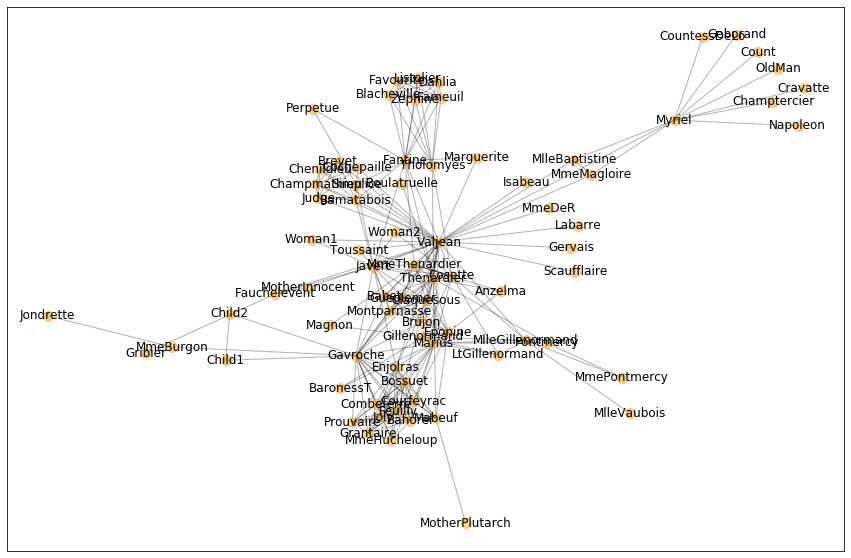

In [12]:
pos = nx.spring_layout(g)
plt.rcParams.update({'figure.figsize': (15, 10)})

nx.draw_networkx_nodes(g, pos,
                      node_color = 'orange', 
                      node_size = 100,
                      alpha = 0.5)

nx.draw_networkx_edges(g, pos, width = 1.0, alpha = 0.3)

labels = {}
for (node, value) in between_centrality.items():
    labels[node] = node, value
    labels[node] = node
    
nx.draw_networkx_labels(g, pos, labels, font_size = 12)
plt.show()

### 4. Eigenvector Centrality

- 큰 네트워크에 연결되어 있는 큰 사람일수록(connection이 많다고 반드시 중요하다고 볼 수는 없음)
- PageRank와 유사

In [13]:
eigenv_centrality = nx.eigenvector_centrality(g)

cent_items = [(b, a) for (a, b) in eigenv_centrality.items()]
cent_items.sort()
cent_items.reverse()

print(cent_items[:5])

[(0.31783893977497685, 'Gavroche'), (0.2676181759885394, 'Valjean'), (0.2671786328235667, 'Enjolras'), (0.2591111453417876, 'Marius'), (0.24213078637474136, 'Bossuet')]


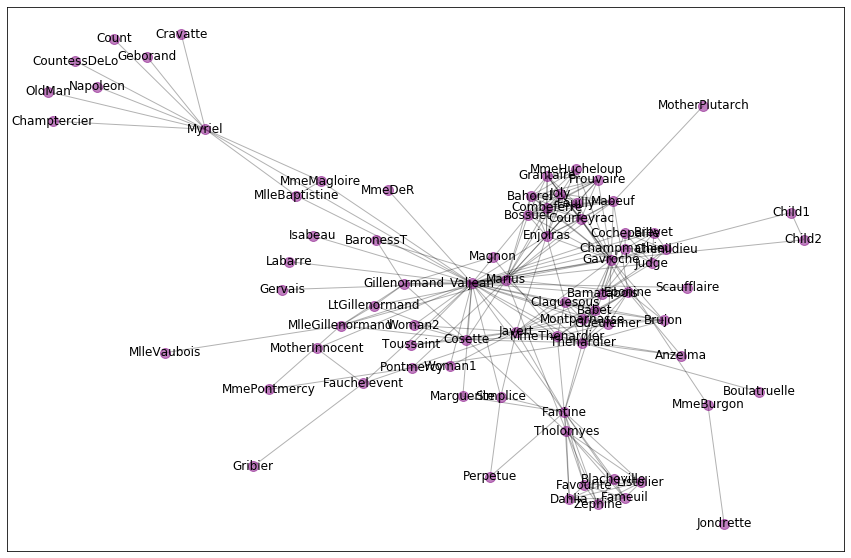

In [14]:
pos = nx.spring_layout(g)
plt.rcParams.update({'figure.figsize': (15, 10)})

nx.draw_networkx_nodes(g, pos,
                      node_color = 'purple', 
                      node_size = 100,
                      alpha = 0.5)

nx.draw_networkx_edges(g, pos, width = 1.0, alpha = 0.3)

labels = {}
for (node, value) in eigenv_centrality.items():
    labels[node] = node, value
    labels[node] = node
    
nx.draw_networkx_labels(g, pos, labels, font_size = 12)
plt.show()

## Community 찾기

### 1. Modularity(Q)

In [15]:
import networkx.algorithms.community as nxcom

communities = sorted(nxcom.greedy_modularity_communities(g), key = len, reverse = True)
print(f"According to the Q value, {len(communities)} communities is proper.")

According to the Q value, 5 communities is proper.


In [17]:
print(communities[0])

frozenset({'Marguerite', 'Brevet', 'Gribier', 'MmeDeR', 'Gervais', 'Labarre', 'Isabeau', 'Geborand', 'Woman1', 'Scaufflaire', 'MotherInnocent', 'MmeMagloire', 'Champmathieu', 'Cravatte', 'MlleBaptistine', 'Cochepaille', 'Judge', 'Count', 'OldMan', 'Myriel', 'Champtercier', 'Napoleon', 'Fauchelevent', 'Chenildieu', 'Valjean', 'CountessDeLo'})


In [18]:
for community_id, nodeset in enumerate(communities):
    print("Community ID:", community_id, "The number of nodes:", len(nodeset))

Community ID: 0 The number of nodes: 26
Community ID: 1 The number of nodes: 17
Community ID: 2 The number of nodes: 15
Community ID: 3 The number of nodes: 13
Community ID: 4 The number of nodes: 6


In [19]:
def set_node_community(G, communities):
    
    for c, v_c in enumerate(communities):
 
        for v in v_c:
            G.nodes[v]['community'] = c + 1
            

def set_edge_community(G):
    
    for v, w, in G.edges:
        
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            G.edges[v, w]['community'] = G.nodes[v]['community']
            
        else:
            G.edges[v, w]['community'] = 0
            
            
def get_color(i, r_off = 1, g_off = 1, b_off = 1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    
    span = high - low
    
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    
    return (r, g, b)

In [20]:
set_node_community(g, communities)
set_edge_community(g)

node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

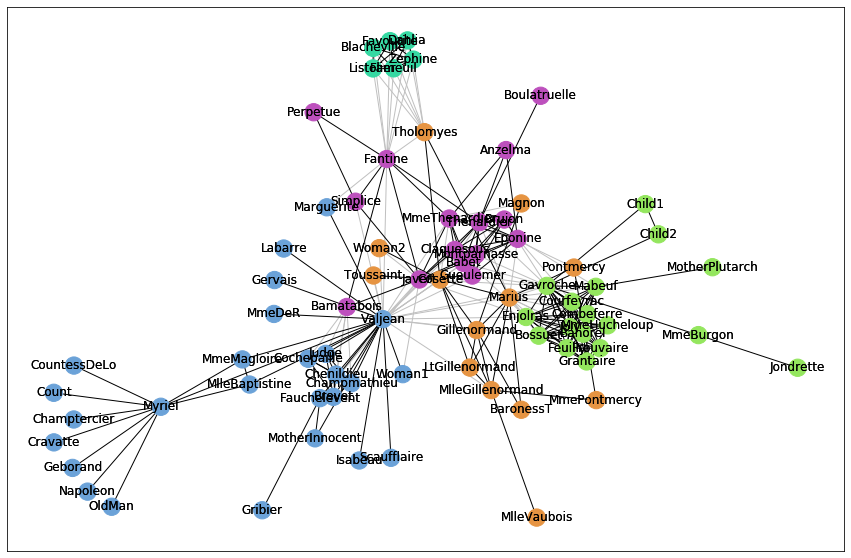

In [21]:
pos = nx.spring_layout(g)
plt.rcParams.update({'figure.figsize': (15, 10)})

nx.draw_networkx(g, pos,
                node_size = 100,
                edgelist = external,
                edge_color = 'silver')

nx.draw_networkx(g, pos,
                node_color = node_color,
                edgelist = internal,
                edge_color = internal_color)

### 2. Girvan-Newman algorithm

In [24]:
result = nxcom.girvan_newman(g)

for obj in result:
    print(obj)
    print(len(obj))

({'Babet', 'Claquesous', 'Javert', 'Marguerite', 'Brevet', 'Pontmercy', 'Combeferre', 'Perpetue', 'Marius', 'Dahlia', 'Gribier', 'Woman2', 'Prouvaire', 'Child1', 'Eponine', 'Bamatabois', 'MmeDeR', 'Listolier', 'Gervais', 'Fantine', 'Labarre', 'Isabeau', 'Magnon', 'Woman1', 'Enjolras', 'Child2', 'Grantaire', 'Montparnasse', 'Scaufflaire', 'MotherInnocent', 'Jondrette', 'Cosette', 'Favourite', 'Bossuet', 'MotherPlutarch', 'Courfeyrac', 'MmeThenardier', 'Champmathieu', 'BaronessT', 'LtGillenormand', 'Simplice', 'MmeBurgon', 'Gillenormand', 'MmeHucheloup', 'Joly', 'Bahorel', 'MmePontmercy', 'Zephine', 'Tholomyes', 'Anzelma', 'Gueulemer', 'Blacheville', 'Cochepaille', 'MlleVaubois', 'Judge', 'Boulatruelle', 'Feuilly', 'Gavroche', 'Fameuil', 'Mabeuf', 'Fauchelevent', 'MlleGillenormand', 'Toussaint', 'Thenardier', 'Chenildieu', 'Brujon', 'Valjean'}, {'Count', 'Geborand', 'Myriel', 'OldMan', 'Cravatte', 'Champtercier', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo'})
2
({'Babet', 

({'Babet', 'MmeThenardier', 'Anzelma', 'Claquesous', 'Javert', 'Montparnasse', 'Thenardier', 'Eponine', 'Brujon', 'Gueulemer'}, {'Perpetue'}, {'MotherInnocent', 'Fauchelevent', 'Gribier'}, {'Fantine', 'Marguerite', 'Fameuil', 'Dahlia', 'Favourite', 'Zephine', 'Tholomyes', 'Listolier', 'Blacheville'}, {'Isabeau'}, {'Child2', 'Child1'}, {'Woman1'}, {'Magnon'}, {'Courfeyrac', 'Feuilly', 'Gavroche', 'Enjolras', 'Combeferre', 'Marius', 'Grantaire', 'Mabeuf', 'Joly', 'Bahorel', 'MmeHucheloup', 'Bossuet', 'Prouvaire'}, {'Count', 'Geborand', 'Myriel', 'OldMan', 'Champtercier', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo'}, {'Jondrette', 'MmeBurgon'}, {'Cravatte'}, {'BaronessT', 'MlleVaubois', 'LtGillenormand', 'Gillenormand', 'MmePontmercy', 'MlleGillenormand'}, {'Cochepaille', 'Champmathieu', 'Judge', 'Brevet', 'Bamatabois', 'Scaufflaire', 'Chenildieu', 'MmeDeR', 'Valjean'}, {'Boulatruelle'}, {'Labarre'}, {'MotherPlutarch'}, {'Toussaint', 'Woman2', 'Cosette'}, {'Gervais'}, {'Si

({'Babet'}, {'Claquesous'}, {'Javert'}, {'Perpetue'}, {'Gribier'}, {'Eponine'}, {'Listolier'}, {'Isabeau'}, {'Child2'}, {'Woman1'}, {'Magnon'}, {'Enjolras'}, {'Fantine', 'Fameuil', 'Dahlia', 'Favourite', 'Zephine', 'Tholomyes', 'Blacheville'}, {'MmeMagloire', 'MlleBaptistine', 'Myriel'}, {'MmeThenardier'}, {'Jondrette', 'MmeBurgon'}, {'Cravatte'}, {'BaronessT', 'Gillenormand'}, {'MmePontmercy'}, {'Cochepaille', 'Champmathieu', 'Judge', 'Brevet', 'Bamatabois', 'Chenildieu', 'Valjean'}, {'Boulatruelle'}, {'Courfeyrac', 'Feuilly', 'Grantaire', 'Combeferre', 'Gavroche', 'Joly', 'Bahorel', 'Bossuet', 'Prouvaire'}, {'Montparnasse', 'Thenardier', 'Brujon', 'Gueulemer'}, {'CountessDeLo'}, {'Child1'}, {'Labarre'}, {'Geborand'}, {'MotherPlutarch'}, {'Count'}, {'Woman2'}, {'Gervais'}, {'Simplice'}, {'MmeHucheloup'}, {'Anzelma'}, {'OldMan'}, {'Champtercier'}, {'Mabeuf'}, {'Napoleon'}, {'MotherInnocent', 'Fauchelevent'}, {'MlleVaubois', 'MlleGillenormand'}, {'Toussaint', 'Cosette'}, {'Marguerite'},

In [25]:
for groups in result:
    
    if len(groups) >= 3:
        communities = groups
        
        break
        
print(communities)

[frozenset({'Marguerite', 'Brevet', 'Gribier', 'MmeDeR', 'Gervais', 'Labarre', 'Isabeau', 'Geborand', 'Woman1', 'Scaufflaire', 'MotherInnocent', 'MmeMagloire', 'Champmathieu', 'Cravatte', 'MlleBaptistine', 'Cochepaille', 'Judge', 'Count', 'OldMan', 'Myriel', 'Champtercier', 'Napoleon', 'Fauchelevent', 'Chenildieu', 'Valjean', 'CountessDeLo'}), frozenset({'Courfeyrac', 'Feuilly', 'Child2', 'Grantaire', 'Enjolras', 'MmeBurgon', 'Combeferre', 'Jondrette', 'Joly', 'Bahorel', 'MmeHucheloup', 'Gavroche', 'Mabeuf', 'Bossuet', 'Child1', 'Prouvaire', 'MotherPlutarch'}), frozenset({'Babet', 'Fantine', 'MmeThenardier', 'Claquesous', 'Javert', 'Anzelma', 'Boulatruelle', 'Perpetue', 'Simplice', 'Montparnasse', 'Gueulemer', 'Thenardier', 'Eponine', 'Brujon', 'Bamatabois'}), frozenset({'BaronessT', 'MlleVaubois', 'LtGillenormand', 'Magnon', 'Pontmercy', 'Marius', 'Gillenormand', 'Cosette', 'MmePontmercy', 'MlleGillenormand', 'Toussaint', 'Woman2', 'Tholomyes'}), frozenset({'Fameuil', 'Dahlia', 'Favou

In [26]:
set_node_community(g, communities)
set_edge_community(g)
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]

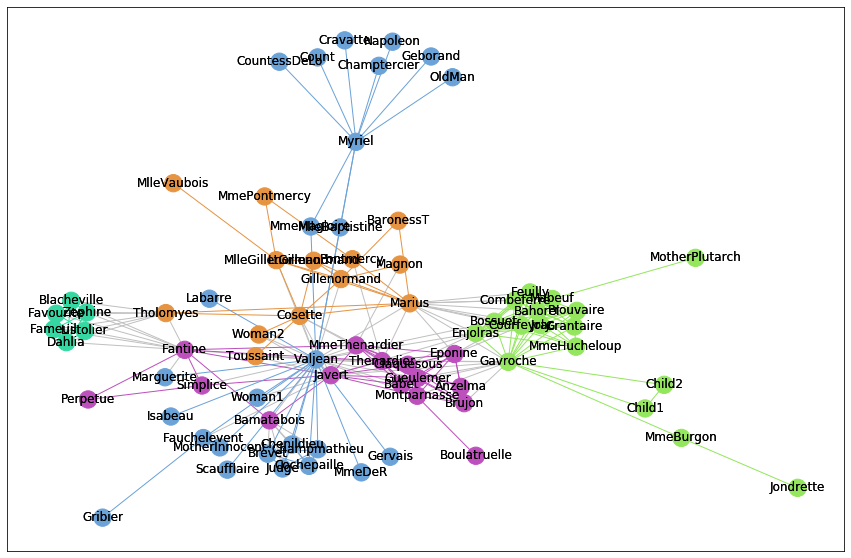

In [27]:
pos = nx.spring_layout(g)
plt.rcParams.update({'figure.figsize': (15, 10)})

nx.draw_networkx(g, pos,
                node_size = 100,
                edgelist = external,
                edge_color = 'silver')

nx.draw_networkx(g, pos,
                node_color = node_color,
                edgelist = internal,
                edge_color = internal_color)